In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.svm import SVC
from plotly.subplots import make_subplots
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [218]:
# Carregue aqui o dataset
dataset = pd.read_csv("..\data\dataset.csv")
answers = pd.read_csv("..\data\ANSWERS.csv")

In [219]:
# Limpa as linhas inteiras que contem registros Nan

# dataset.SENIORCITIZEN = dataset.SENIORCITIZEN.fillna(dataset.SENIORCITIZEN.median())
# dataset.PARTNER = dataset.PARTNER.fillna(dataset.PARTNER.median())
# dataset.DEPENDENTS = dataset.DEPENDENTS.fillna(dataset.DEPENDENTS.median())
# dataset.TENURE = dataset.TENURE.fillna(dataset.TENURE.median())
# dataset.INTERNETSERVICE = dataset.INTERNETSERVICE.fillna(dataset.INTERNETSERVICE.median())
# dataset.DEVICEPROTECTION = dataset.DEVICEPROTECTION.fillna(dataset.DEVICEPROTECTION.median())
# dataset.STREAMINGTV = dataset.STREAMINGTV.fillna(dataset.STREAMINGTV.median())
# dataset.STREAMINGMOVIES = dataset.STREAMINGMOVIES.fillna(dataset.STREAMINGMOVIES.median())
# dataset.CONTRACT = dataset.CONTRACT.fillna(dataset.CONTRACT.median())
# dataset.MONTHLYCHARGES = dataset.MONTHLYCHARGES.fillna(dataset.MONTHLYCHARGES.median())
# dataset.TOTALCHARGES = dataset.TOTALCHARGES.fillna(dataset.TOTALCHARGES.median())
# dataset.PHONESERVICE = dataset.PHONESERVICE.fillna(dataset.PHONESERVICE.median())
# dataset.MULTIPLELINES = dataset.MULTIPLELINES.fillna(dataset.MULTIPLELINES.median())
# dataset.ONLINESECURITY = dataset.ONLINESECURITY.fillna(dataset.ONLINESECURITY.median())
# dataset.ONLINEBACKUP = dataset.ONLINEBACKUP.fillna(dataset.ONLINEBACKUP.median())
# dataset.TECHSUPPORT = dataset.TECHSUPPORT.fillna(dataset.TECHSUPPORT.median())
# dataset.PAPERLESSBILLING = dataset.PAPERLESSBILLING.fillna(dataset.PAPERLESSBILLING.median())
dataset = dataset.dropna()

In [220]:
# Limpa registros que tem espaco - 2268 mean

dataset.TOTALCHARGES = dataset.TOTALCHARGES.replace(r'\s+', 2268, regex=True)
dataset.TOTALCHARGES = pd.to_numeric(dataset.TOTALCHARGES)

<AxesSubplot:>

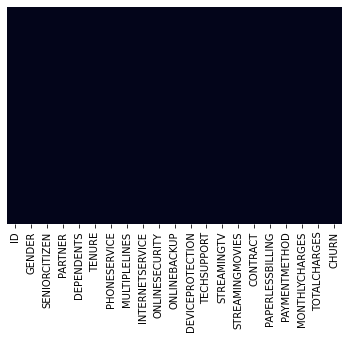

In [209]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [221]:
### Normalizando variaveis continuas 
scale_vars = ['TENURE', 'MONTHLYCHARGES','TOTALCHARGES']
scaler = StandardScaler() 
dataset[scale_vars] = scaler.fit_transform(dataset[scale_vars])

In [222]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
le = LabelEncoder()
# cols = ['GENDER', 'PAYMENTMETHOD']
# dataset[cols] = dataset[cols].apply(LabelEncoder().fit_transform)

dataset.SENIORCITIZEN = dataset.SENIORCITIZEN.astype('int')
dataset.PARTNER = dataset.PARTNER.replace({'No':0,'Yes':1})
dataset.DEPENDENTS = dataset.DEPENDENTS.replace({'No':0,'Yes':1})
dataset.PHONESERVICE = dataset.PHONESERVICE.replace({'No':0,'Yes':1})
# dataset.MULTIPLELINES = dataset.MULTIPLELINES.replace({'No phone service':0,'No':1,'Yes':2})
# dataset.INTERNETSERVICE = dataset.INTERNETSERVICE.replace({'No':0,'DSL':1,'Fiber optic':2})
# dataset.ONLINESECURITY = dataset.ONLINESECURITY.replace({'No internet service':0, 'No':1,'Yes':2})
# dataset.ONLINEBACKUP = dataset.ONLINEBACKUP.replace({'No internet service':0, 'No':1,'Yes':2})
# dataset.DEVICEPROTECTION = dataset.DEVICEPROTECTION.replace({'No internet service':0, 'No':1,'Yes':2})
# dataset.TECHSUPPORT = dataset.TECHSUPPORT.replace({'No internet service':0, 'No':1,'Yes':2})
# dataset.STREAMINGTV = dataset.STREAMINGTV.replace({'No internet service':0, 'No':1,'Yes':2})
# dataset.STREAMINGMOVIES = dataset.STREAMINGMOVIES.replace({'No internet service':0, 'No':1,'Yes':2})
# dataset.CONTRACT = dataset.CONTRACT.replace({'Month-to-month':0,'One year':1, 'Two year':2})
dataset.PAPERLESSBILLING = dataset.PAPERLESSBILLING.replace({'No':0,'Yes':1})
dataset.MONTHLYCHARGES = dataset.MONTHLYCHARGES.astype('float')
dataset.TOTALCHARGES = dataset.TOTALCHARGES.astype('float')
dataset.CHURN = dataset.CHURN.replace({'No':0,'Yes':1})

In [229]:
col = ['GENDER', 'PAYMENTMETHOD','MULTIPLELINES','INTERNETSERVICE','ONLINESECURITY','ONLINEBACKUP','DEVICEPROTECTION','TECHSUPPORT','STREAMINGTV','STREAMINGMOVIES','CONTRACT']
dataset = pd.get_dummies(dataset, columns=col)
dataset.drop(col, axis=1, inplace=True)

KeyError: "None of [Index(['GENDER', 'PAYMENTMETHOD', 'MULTIPLELINES', 'INTERNETSERVICE',\n       'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',\n       'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT'],\n      dtype='object')] are in the [columns]"

In [230]:
dataset.columns

Index(['ID', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'PAPERLESSBILLING', 'MONTHLYCHARGES', 'TOTALCHARGES',
       'CHURN', 'GENDER_Female', 'GENDER_Male',
       'PAYMENTMETHOD_Bank transfer (automatic)',
       'PAYMENTMETHOD_Credit card (automatic)',
       'PAYMENTMETHOD_Electronic check', 'PAYMENTMETHOD_Mailed check',
       'MULTIPLELINES_No', 'MULTIPLELINES_No phone service',
       'MULTIPLELINES_Yes', 'INTERNETSERVICE_DSL',
       'INTERNETSERVICE_Fiber optic', 'INTERNETSERVICE_No',
       'ONLINESECURITY_No', 'ONLINESECURITY_No internet service',
       'ONLINESECURITY_Yes', 'ONLINEBACKUP_No',
       'ONLINEBACKUP_No internet service', 'ONLINEBACKUP_Yes',
       'DEVICEPROTECTION_No', 'DEVICEPROTECTION_No internet service',
       'DEVICEPROTECTION_Yes', 'TECHSUPPORT_No',
       'TECHSUPPORT_No internet service', 'TECHSUPPORT_Yes', 'STREAMINGTV_No',
       'STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No', 'STR

In [190]:
# Retira a coluna ID

object_columns = ['ID']
# object_columns = ['ID', 'TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES']
dataset.drop(object_columns, axis=1, inplace=True)

In [191]:
target = ['CHURN']
y = dataset[target]
X = dataset.drop(target, axis=1)
y = np.ravel(y)

test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, random_state=42, stratify=y)

In [192]:
from imblearn.over_sampling import SMOTE as Smote
smt = Smote(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [193]:
# Com SMOTE deu F1 churn 0.6404907975460123, N-churn 0.82 e acc 0.7621753246753247 (usando  {'No internet service':0, 'No':1,'Yes':2}) e etc ) normalizado
# e com media (2269) dos 3 valores que eram string
# Acurácia do modelo (com cross validate): 0.8028776933762941
# F1 micro: 0.7622
# F1 macro: 0.7314
# F1 weighted: 0.7746
# recall  0.75 e 0.81
model = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_features="log2", max_depth=7, min_samples_split=10,
                                random_state=42, n_jobs=11, criterion='entropy', bootstrap=False)

# Com SMOTE deu F1 churn 0.6378244746600742, N-churn 0.82 e acc 0.7621753246753247 (usando  {'No internet service':0, 'No':1,'Yes':2}) e etc ) normalizado
# e com 0 nos 3 valores que eram string
# Acurácia do modelo (com cross validate): 0.8033609182349226
# F1 micro: 0.7622
# F1 macro: 0.7304
# F1 weighted: 0.7744
# recall  0.75 e 0.80

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, n_jobs=11,
                       random_state=42)

Accuracy score = 0.7621753246753247
Mean absolute error = 0.23782467532467533
F1 = 0.6404907975460123


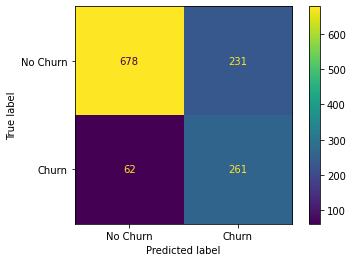

              precision    recall  f1-score   support

    No Churn       0.92      0.75      0.82       909
       Churn       0.53      0.81      0.64       323

    accuracy                           0.76      1232
   macro avg       0.72      0.78      0.73      1232
weighted avg       0.82      0.76      0.77      1232



In [194]:
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test, predictions)}')
print(f'Mean absolute error = {mean_absolute_error(y_test, predictions)}')
print(f'F1 = {f1(predictions,y_test)}')

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ['No Churn', 'Churn']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_test, predictions, target_names=labels))

In [195]:
from sklearn.model_selection import cross_val_score
acc_cv = cross_val_score(model,X_train, y_train,scoring = "f1_macro",cv=10)
print(f"Acurácia do modelo (com cross validate): {acc_cv.mean()}")

Acurácia do modelo (com cross validate): 0.8028776933762941


In [196]:
print("F1 micro: %1.4f" % f1(y_test, predictions, average='micro'))
print("F1 macro: %1.4f" % f1(y_test, predictions, average='macro'))
print("F1 weighted: %1.4f" % f1(y_test, predictions, average='weighted'))

F1 micro: 0.7622
F1 macro: 0.7314
F1 weighted: 0.7746
